In [2]:
from ase import *
from pymatgen import *
from lmf import *


# Quick Visualization

We here use ASE to visualize

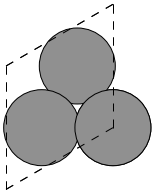

In [21]:
from ase.io import read, write
from IPython.core.display import Image
b = read('c.cif')
ase.io.write('C.png',     
             b,              
             format='png',        
             show_unit_cell=2,    
             rotation='0y,0x,90z', 
             scale=50)            

Image(filename='C.png')

# Generate Graphene from Carbon

In [6]:
from pymatgen.io.cif import CifParser
parser = CifParser("c.cif")
structure = parser.get_structures()[0]
print(structure)

Full Formula (C4)
Reduced Formula: C
abc   :   2.467720   2.467720   8.685040
angles:  90.000000  90.000000 120.000000
Sites (4)
  #  SP           a         b     c
---  ----  --------  --------  ----
  0  C     0         0         0.75
  1  C     0         0         0.25
  2  C     0.666667  0.333334  0.25
  3  C     0.333333  0.666666  0.75


###  Make monolayer

In [7]:
remove=[]
for i in range(len(structure)):
    if structure[i].frac_coords[2]>.5:
        remove.append(i)
structure.remove_sites(remove)
print(structure)

Full Formula (C2)
Reduced Formula: C
abc   :   2.467720   2.467720   8.685040
angles:  90.000000  90.000000 120.000000
Sites (2)
  #  SP           a         b     c
---  ----  --------  --------  ----
  0  C     0         0         0.25
  1  C     0.666667  0.333334  0.25


In [8]:
from pymatgen.core.lattice import Lattice
from pymatgen import Structure
lattice=Lattice.from_parameters(a=structure.lattice.a,b=structure.lattice.b,c=19,alpha=structure.lattice.alpha,beta=structure.lattice.beta,gamma=structure.lattice.gamma)
mono=Structure(lattice=lattice,coords=structure.frac_coords,species=structure.species)
print(mono)

Full Formula (C2)
Reduced Formula: C
abc   :   2.467720   2.467720  19.000000
angles:  90.000000  90.000000 120.000000
Sites (2)
  #  SP           a         b     c
---  ----  --------  --------  ----
  0  C     0         0         0.25
  1  C     0.666667  0.333334  0.25


# lmf moduels

In [9]:
from pymatgen.io.ase import *
atoms=AseAtomsAdaptor().get_atoms(mono)
print(atoms)

Atoms(symbols='C2', pbc=True, cell=[[2.467720000000001, 0.0, 1.5110426995959538e-16], [-1.2338600000000008, 2.1371082094269345, -3.9683964250600296e-16], [0.0, 0.0, 19.0]])


## creating lmf inputs are really simple ! 

In [ ]:
from lmf import *
lmf().write_infile(atoms)

In [73]:
with open("ctrl.temp") as f:
    for line in f:
        print(line)

# Autogenerated from init.temp using:

# blm --express=0 --ctrl=ctrl --molstat init.temp --nk=4,4,4 --gmax=10.5 --gw --nkgw=4,4,4

% const nit=10

% const met=5

% const so=0 nsp=so?2:1

% const lxcf=2 lxcf1=0 lxcf2=0

% const pwmode=0 pwemax=3

% const sig=12 gwemax=2.0 gcutb=2.0 gcutx=1.7

% const nk1=4 nk2=nk1 nk3=nk2 nkgw1=4 nkgw2=nkgw1 nkgw3=nkgw2 gmax=10.5 beta=.3

% const conv=1e-5 convc=3e-5 dhftol=0



VERS  LM:7 FP:7 # ASA:7

IO    SHOW=f HELP=f IACTIV=f VERBOS=35,35  OUTPUT=*

#SYMGRP i*r3z::(-1/3,-0.6666666,1/2) r2z::(-1/3,1/3,0) r2y::(0,0,-1/2)

HAM   GMAX={gmax}

      AUTOBAS[PNU=1 LOC=1 MTO=4 LMTO=5 GW=1 PFLOAT=2,1]

      PWMODE={pwmode} PWEMIN=0 PWEMAX={pwemax} OVEPS=0

      XCFUN={lxcf},{lxcf1},{lxcf2}

      FORCES={so==0} ELIND=-0.7 NSPIN={nsp} SO={so} 

      RDSIG={sig} SIGP[EMAX={gwemax}]

ITER  MIX=B2,b={beta},k=7  NIT={nit}  CONVC=1e-5

BZ    METAL={met}  NKABC={nk1},{nk2},{nk3}

GW    NKABC={nkgw1},{nkgw2},{nkgw3} GCUTB={gcutb} GCUTX={gcutx} DELRE=.01 .1 

 

### Most general Input file you can create

In [ ]:
carbon=lmf(nkabc=[4,4,4],
                   nkgw=[4,4,4],                   #GW kpts
                   gw=1,                           #enable GW tags
                   ctrl="temp",                  #ctrl name
                   gmax=10.5,                      #gmax
                   p=5,                         # mpi processors
                   relax={0:[1,1,0],1:[1,1,0]}, #relax dictonary atom position and [x,y,z] bool for relaxation starts from 0 index
                   dyn_iter=20                    #number of relax iterations
                       )
carbon.write_infile(atoms) 


In [78]:
with open("ctrl.temp") as f:
    for line in f:
        print(line)

# Autogenerated from init.temp using:

# blm --express=0 --ctrl=ctrl --molstat init.temp --nk=4,4,4 --gmax=10.5 --dv=minx=20 --gw --nkgw=4,4,4

% const nit=10

% const met=5

% const so=0 nsp=so?2:1

% const lxcf=2 lxcf1=0 lxcf2=0

% const pwmode=0 pwemax=3

% const sig=12 gwemax=2.0 gcutb=2.0 gcutx=1.7

% const nk1=4 nk2=nk1 nk3=nk2 nkgw1=4 nkgw2=nkgw1 nkgw3=nkgw2 gmax=10.5 beta=.3 minx=20

% const conv=1e-5 convc=3e-5 dhftol=0



VERS  LM:7 FP:7 # ASA:7

IO    SHOW=f HELP=f IACTIV=f VERBOS=35,35  OUTPUT=*

#SYMGRP i*r3z::(-1/3,-0.6666666,1/2) r2z::(-1/3,1/3,0) r2y::(0,0,-1/2)

HAM   GMAX={gmax}

      AUTOBAS[PNU=1 LOC=1 MTO=4 LMTO=5 GW=1 PFLOAT=2,1]

      PWMODE={pwmode} PWEMIN=0 PWEMAX={pwemax} OVEPS=0

      XCFUN={lxcf},{lxcf1},{lxcf2}

      FORCES={so==0} ELIND=-0.7 NSPIN={nsp} SO={so} 

      RDSIG={sig} SIGP[EMAX={gwemax}]

ITER  MIX=B2,b={beta},k=7  NIT={nit}  CONVC=1e-5

BZ    METAL={met}  NKABC={nk1},{nk2},{nk3}

GW    NKABC={nkgw1},{nkgw2},{nkgw3} GCUTB={gcutb} GCUTX={gc

In [79]:
print(carbon.get_potential_energy(atoms))

running mpirun -np 1 lmfa ctrl.temp......
done

running cp basp0.temp basp.temp......
done

running mpirun -np 1 lmfa ctrl.temp......
done

running mpirun -np 5 lmf -vnit=10 --wpos=pos --wforce=force temp>output......
done

running mpirun -np 5 lmf -vnit=1000 --rpos=pos --wpos=pos_relax --wforce=force temp>output......
done

Calculation Converged
-151.2681244


In [80]:
print(carbon.get_forces(atoms))

[[-0. -0.  0.]
 [ 0.  0. -0.]]


## Something useful calculate the "Cleavege energy" of Graphene

In [151]:
import numpy as np
energies=[]
graphenes=[]
caxis=[]
for i in np.linspace(3.5,6,10):
    
    #Create slab
    lattice=Lattice.from_parameters(a=structure.lattice.a,b=structure.lattice.b,c=i,alpha=structure.lattice.alpha,beta=structure.lattice.beta,gamma=structure.lattice.gamma)
    mono=Structure(lattice=lattice,coords=structure.frac_coords,species=structure.species)
    #make ASE objects
    atoms=AseAtomsAdaptor().get_atoms(mono)
    
    #calculate Energy
    graphene=lmf(nkabc=[5,5,2],
        ctrl="temp",                  #ctrl name
        gmax=10.5,                      #gmax
        p=10                    # mpi processors
        )
    energies.append(graphene.get_potential_energy(atoms))
    graphenes.append(graphene)
    #clean the created files ! 
    lmf().clean()
    
    caxis.append(i)
    

running mpirun -np 1 lmfa ctrl.temp......
done

running cp basp0.temp basp.temp......
done

running mpirun -np 1 lmfa ctrl.temp......
done

running mpirun -np 10 lmf -vnit=1000 --wforce=force --wpos=pos temp>output......
done

Calculation Converged
running mpirun -np 1 lmfa ctrl.temp......
done

running cp basp0.temp basp.temp......
done

running mpirun -np 1 lmfa ctrl.temp......
done

running mpirun -np 10 lmf -vnit=1000 --wforce=force --wpos=pos temp>output......
done

Calculation Converged
running mpirun -np 1 lmfa ctrl.temp......
done

running cp basp0.temp basp.temp......
done

running mpirun -np 1 lmfa ctrl.temp......
done

running mpirun -np 10 lmf -vnit=1000 --wforce=force --wpos=pos temp>output......
done

Calculation Converged
running mpirun -np 1 lmfa ctrl.temp......
done

running cp basp0.temp basp.temp......
done

running mpirun -np 1 lmfa ctrl.temp......
done

running mpirun -np 10 lmf -vnit=1000 --wforce=force --wpos=pos temp>output......
done

Calculation Converged
runn

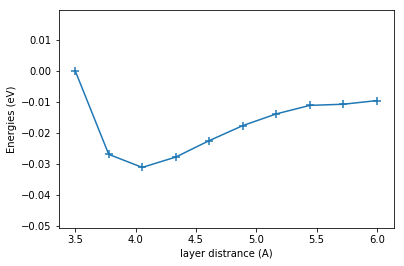

In [162]:
import matplotlib.pyplot as plt
plt.scatter(caxis,(energies-np.max(energies))*13.6,marker="+",s=50)
plt.plot(caxis,(energies-np.max(energies))*13.6)
plt.xlabel("layer distrance (A)")
plt.ylabel("Energies (eV)")
plt.show()

### so we can choose c = 10 to be in the safer side

In [11]:
lattice=Lattice.from_parameters(a=structure.lattice.a,b=structure.lattice.b,c=10,alpha=structure.lattice.alpha,beta=structure.lattice.beta,gamma=structure.lattice.gamma)
mono=Structure(lattice=lattice,coords=structure.frac_coords,species=structure.species)
from lmf import lmf
from pymatgen.io.ase import *
atoms=AseAtomsAdaptor().get_atoms(mono)

from pymatgen.io.cif import CifWriter
CifWriter(mono).write_file("graphene.cif")

## Plotting bands is this simple ! 

running mpirun -np 10 lmf -vnit=1 --band~mq~fn=syml temp......
done

running plotquestaal.py --bands --erange -6 6 -c=temp......
done



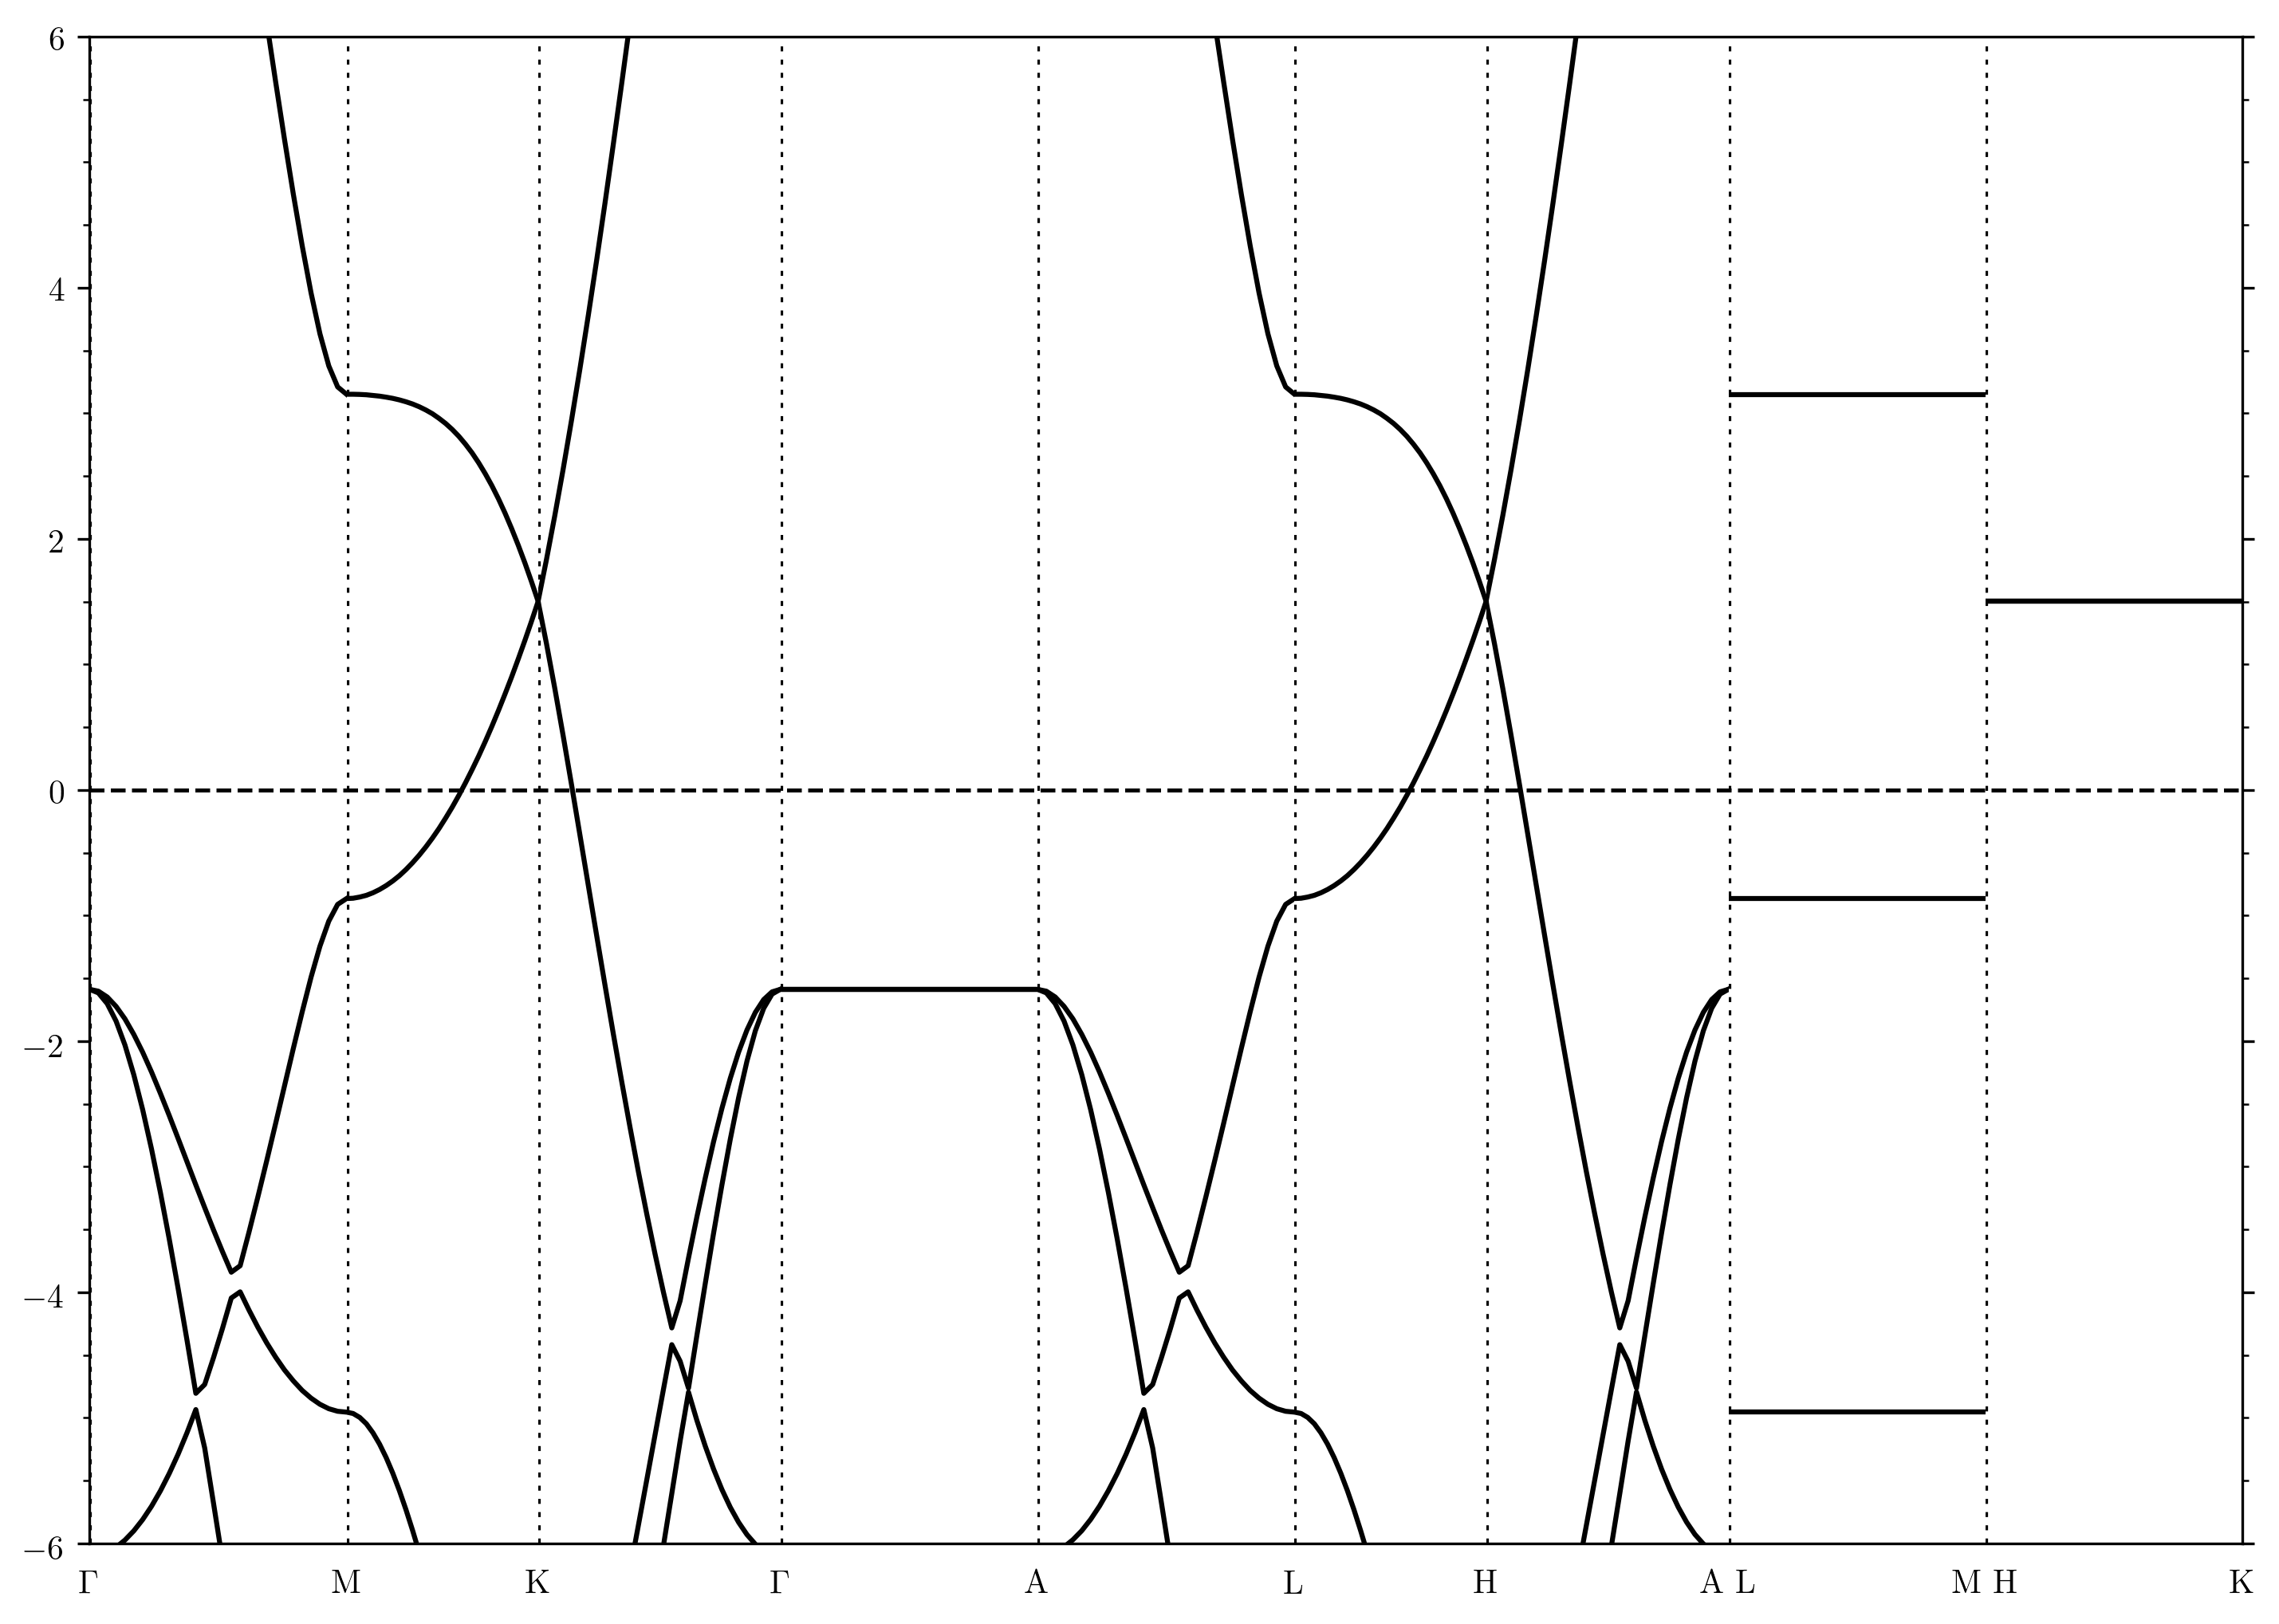

In [10]:
#plotting bands !!!
graphene.plot_bands(atoms)

from IPython.core.display import Image
Image(filename="plot_bands.png")

### Check out that cool dirac band at K point ! 

Fermi energy is kind of ploted wrong because caucluating fermi energy for metals are almost alaways harder and needs fine tuning ctrl file ! 

So what are those flat lines at $L-M$, $H-K$ and $\Gamma-A$ ?

Well, as we need to still maintian periodicity in 3D we have made a 2D graphene that is still periodic in c axis but so far away they are basically non interacting layers. thus these other kpaths are in the direction of that axis and as you can see because of almost straignt energy levels, we have extremely 0 transport along that direction which shows that we have a good enough representation of 2D system.

# Let us do some physics

Let us see what happens in case of buckled graphene 

rm init 1 rst.temp mixm.temp wkp.temp basp* atm.temp save.temp init.temp hssn.temp -r
running mpirun -np 1 lmfa ctrl.temp......
done

running cp basp0.temp basp.temp......
done

running mpirun -np 1 lmfa ctrl.temp......
done

running mpirun -np 10 lmf -vnit=1000 --wforce=force --wpos=pos temp>output......
done

Calculation Converged
running mpirun -np 10 lmf -vnit=1 --band~mq~fn=syml temp......
done

running plotquestaal.py --bands --erange -6 6 -c=temp......
done



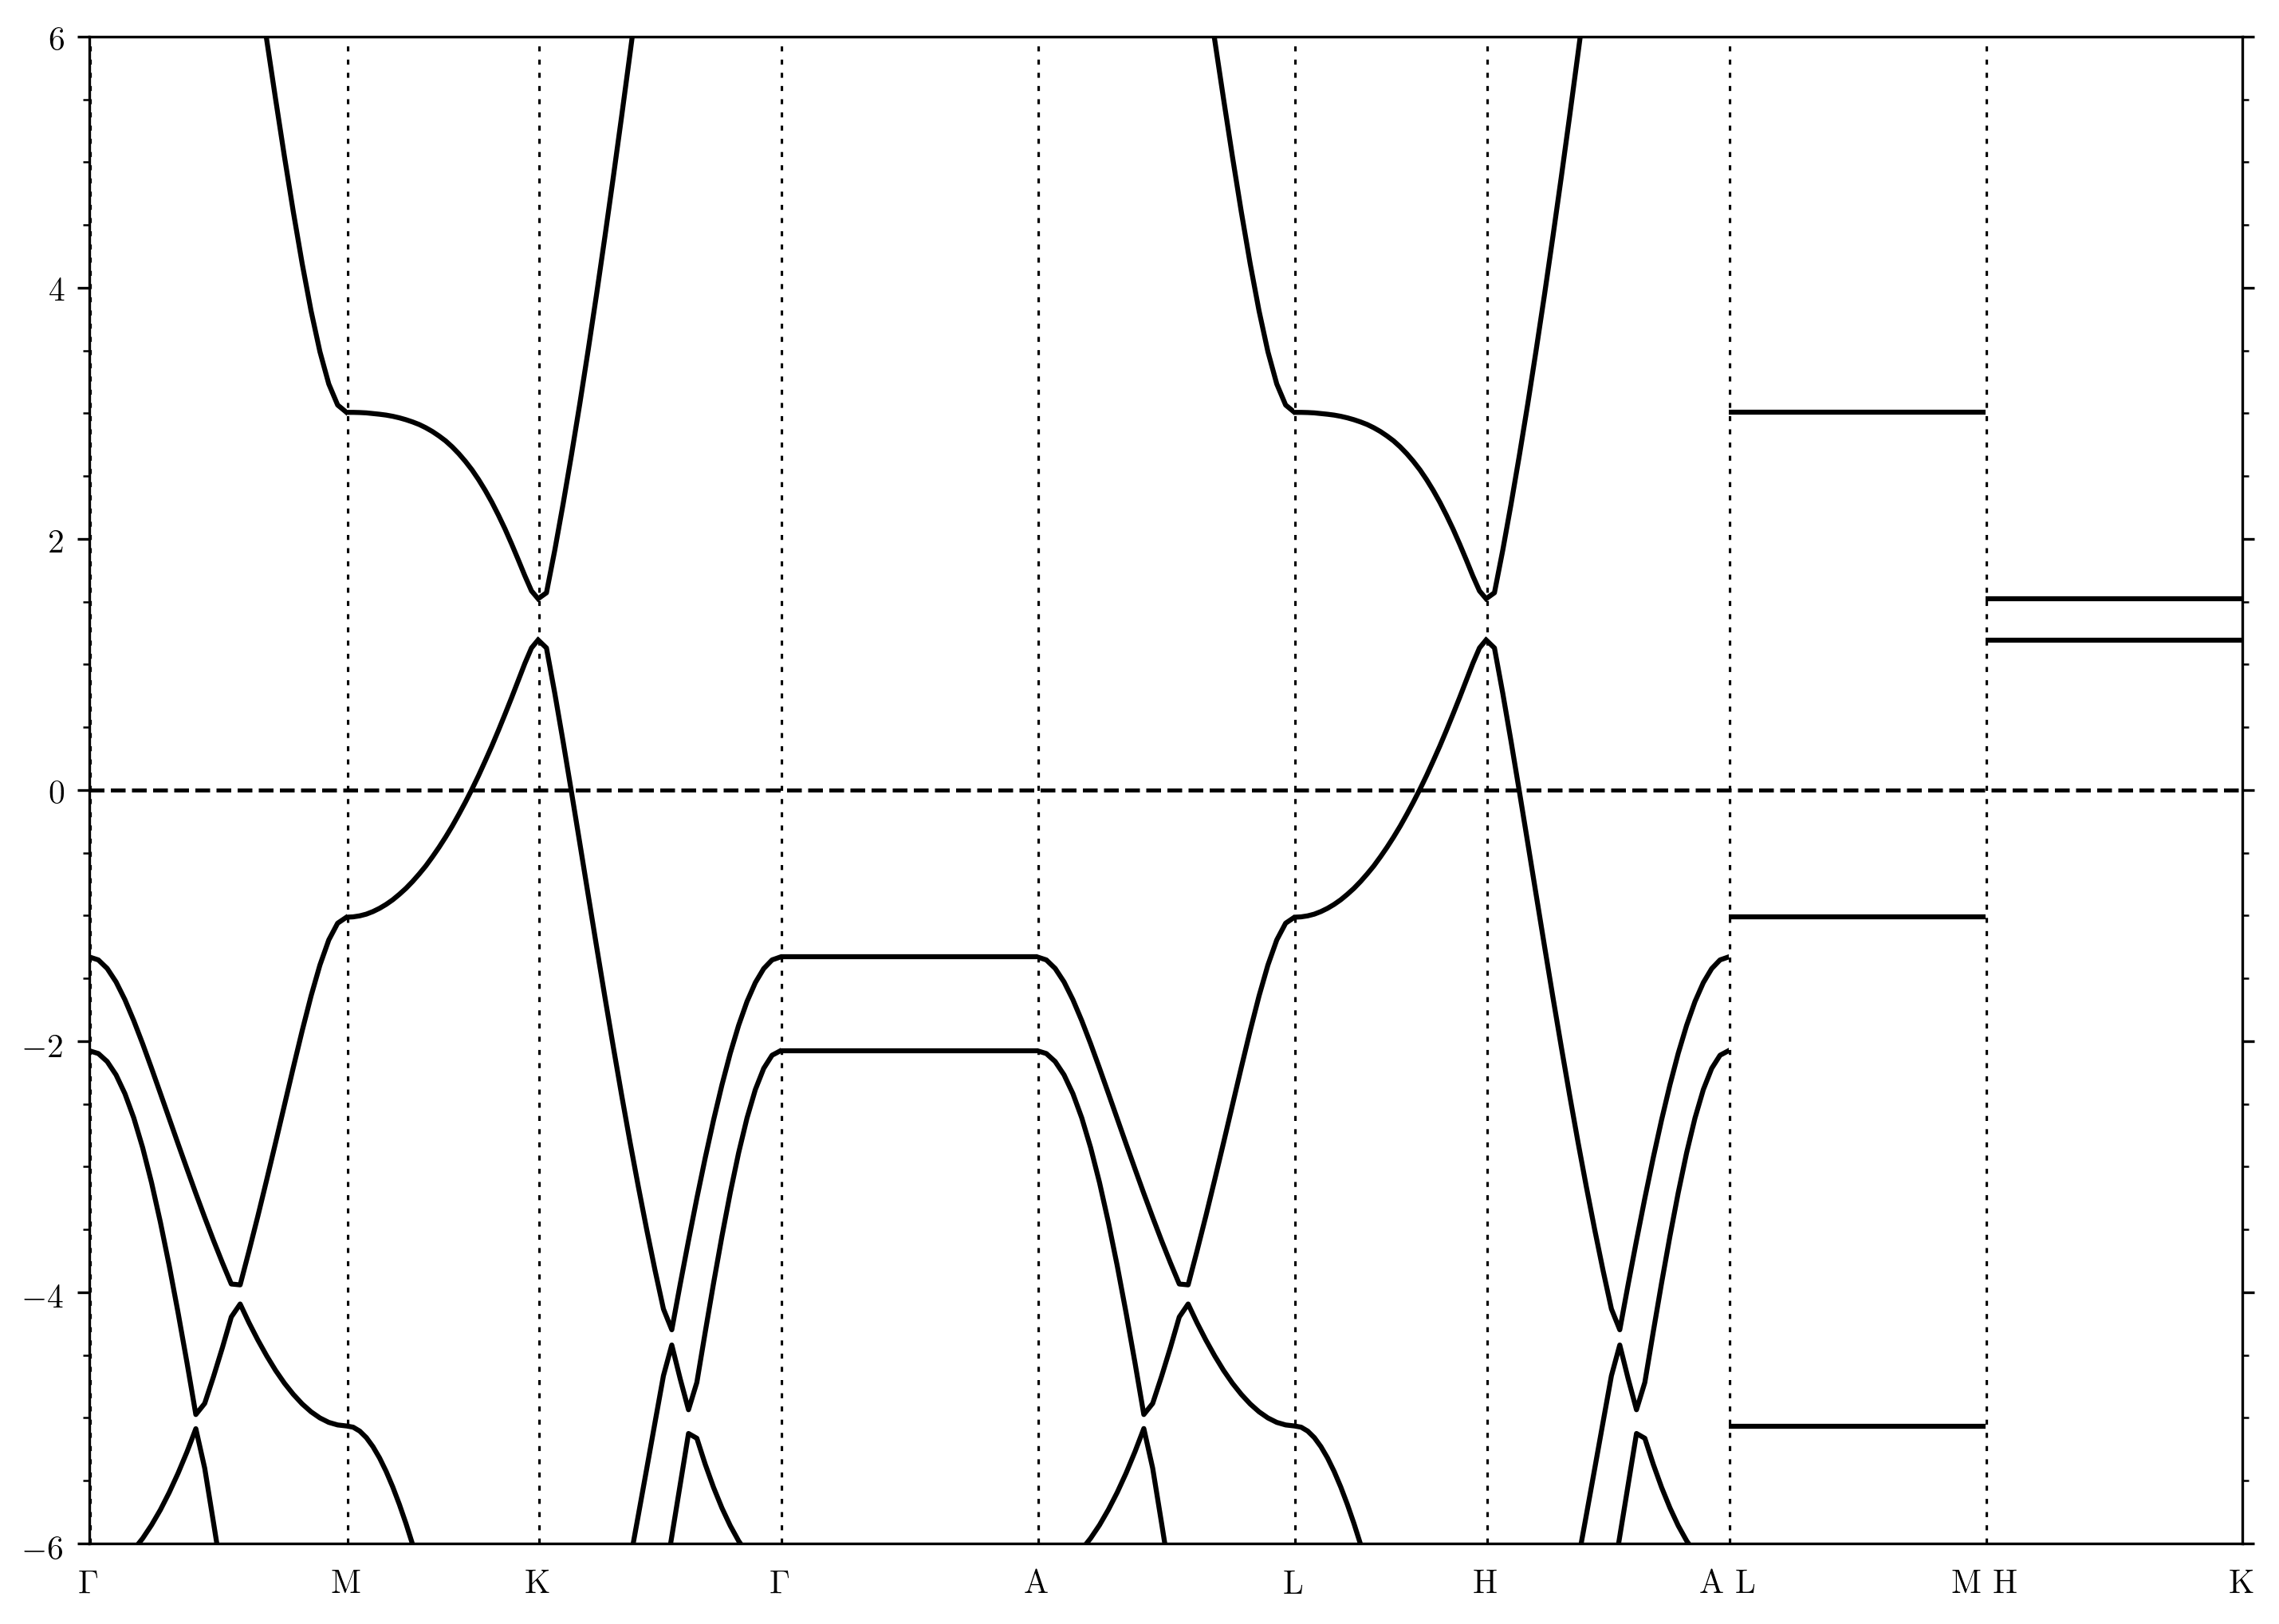

In [19]:
lattice=Lattice.from_parameters(a=structure.lattice.a,b=structure.lattice.b,c=10,alpha=structure.lattice.alpha,beta=structure.lattice.beta,gamma=structure.lattice.gamma)
frac_coords=structure.frac_coords
frac_coords[1][1]+=.01
mono=Structure(lattice=lattice,coords=frac_coords,species=structure.species)
from lmf import lmf
from pymatgen.io.ase import *
atoms=AseAtomsAdaptor().get_atoms(mono)
#print(mono)
lmf(p=10,nkabc=[5,5,2]).plot_bands(atoms)
from IPython.core.display import Image
Image(filename="plot_bands.png")

rm init 1 rst.temp mixm.temp wkp.temp basp* atm.temp save.temp init.temp hssn.temp -r
running mpirun -np 1 lmfa ctrl.temp......
done

running cp basp0.temp basp.temp......
done

running mpirun -np 1 lmfa ctrl.temp......
done

running mpirun -np 10 lmf -vnit=1000 --wforce=force --wpos=pos temp>output......
done

Calculation Converged
running mpirun -np 10 lmf -vnit=1 --band~mq~fn=syml temp......
done

running plotquestaal.py --bands --erange -6 6 -c=temp......
done



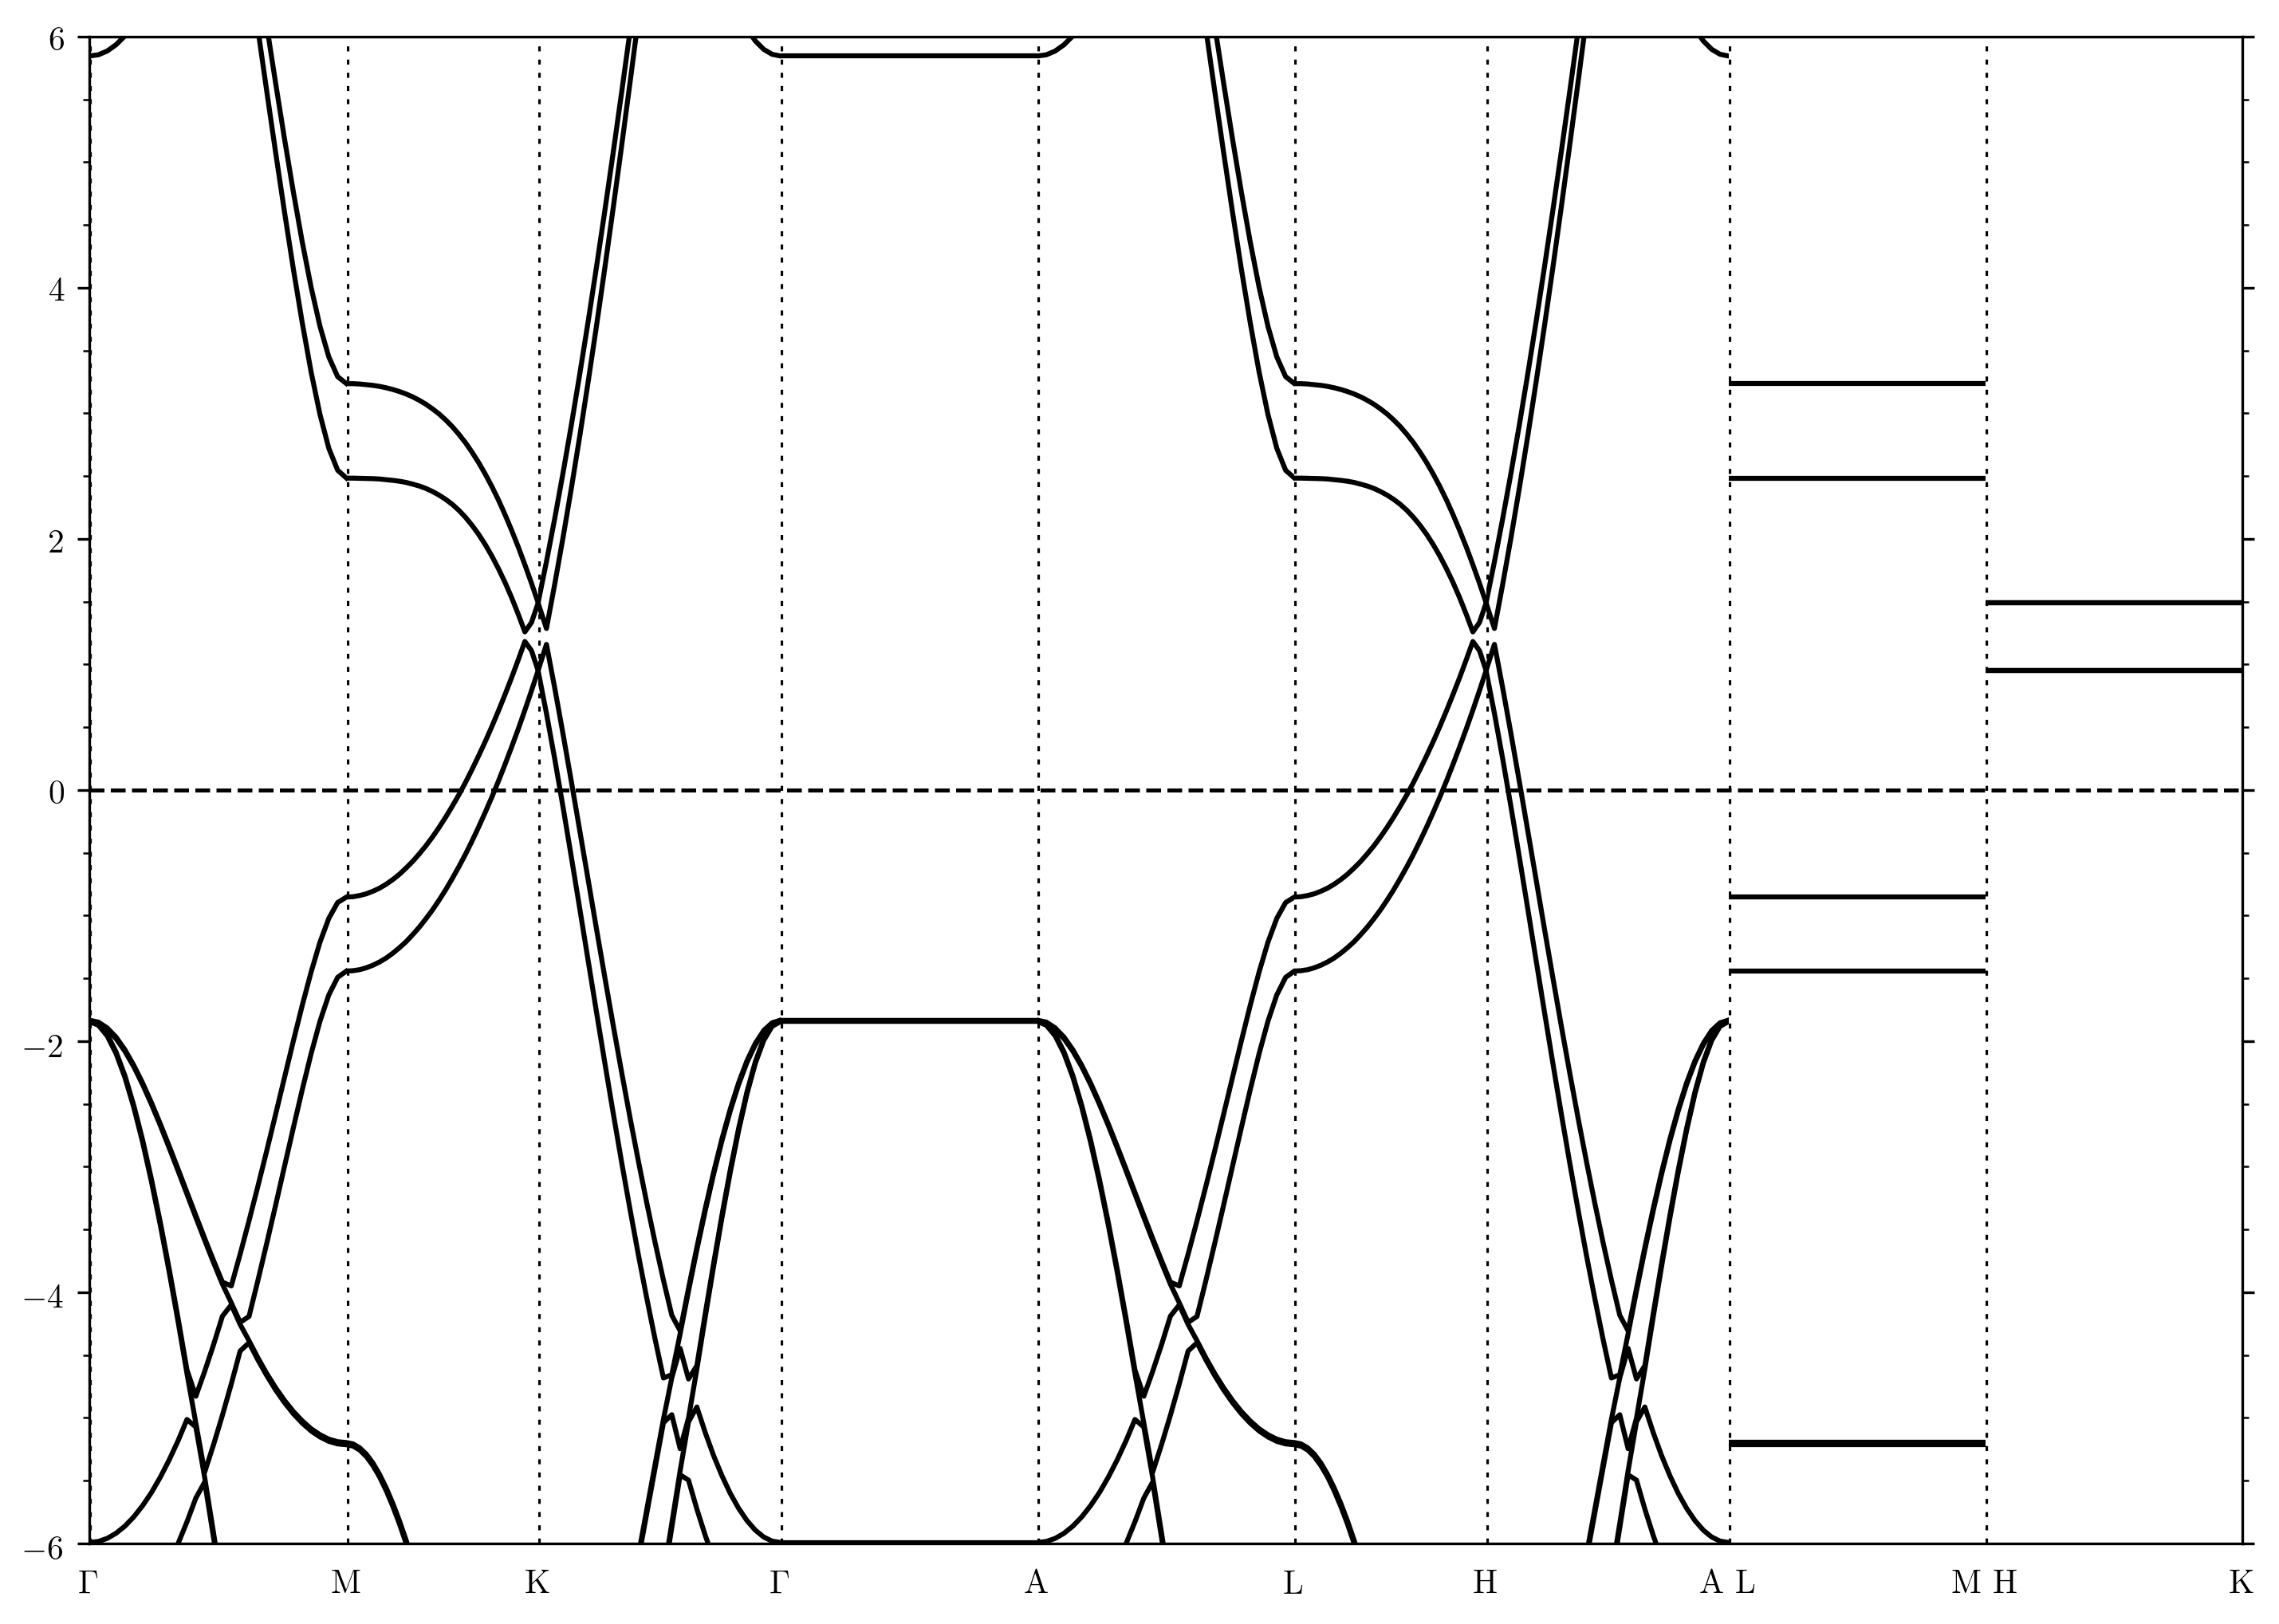

In [14]:
import numpy as np
lattice=Lattice.from_parameters(a=structure.lattice.a,b=structure.lattice.b,c=30,alpha=structure.lattice.alpha,beta=structure.lattice.beta,gamma=structure.lattice.gamma)
cart_coords=np.ndarray.tolist(structure.cart_coords)

#copy all the same atoms and move last 2 atoms by 1 A in c direction
coords=[]
for i in structure.cart_coords:
    coords.append(i)
for i in structure.cart_coords:
    coords.append(i)
species=[]
for i in structure.species:
    species.append(i)
for i in structure.species:
    species.append(i)    
coords[2][2]+=3.5
coords[3][2]+=3.5
mono=Structure(lattice=lattice,coords=coords,species=species,coords_are_cartesian=True)
from pymatgen.io.cif import CifWriter
CifWriter(mono).write_file("graphene_bilayer.cif")

from lmf import lmf
from pymatgen.io.ase import *
atoms=AseAtomsAdaptor().get_atoms(mono)
lmf(p=10,nkabc=[5,5,2]).plot_bands(atoms,kpts=71)
from IPython.core.display import Image
Image(filename="plot_bands.png")

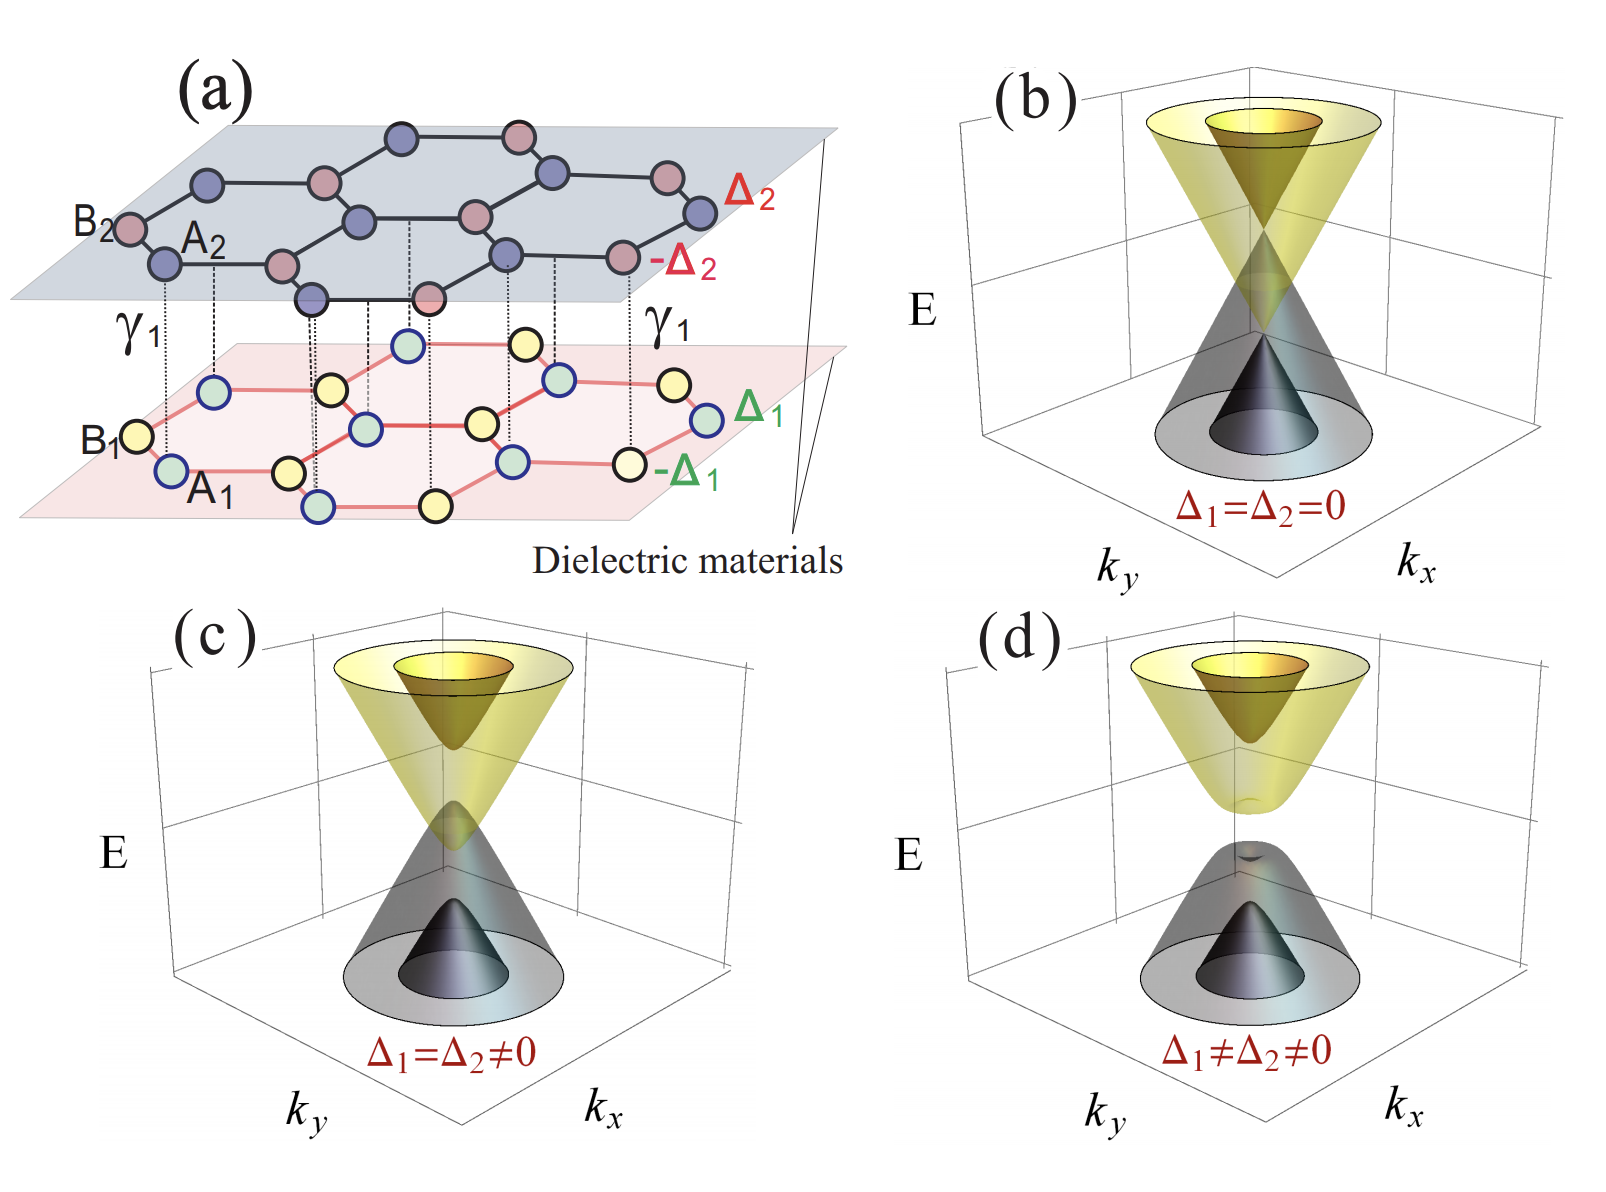

In [10]:
Image(filename="graphene paper.png")

If you do it in a finer mesh you will see that you now will see two dirac points. But actually now in 3D you have a diac nodal line semimetal 


as shown in arXiv:1808.03919 

This is a very interesting play of symetry at play. But as shown in the paper fig(c) even in the presence of Spin orbit coupling, you still have nodal lines but now it is "weakley protected" as if $\Delta_1 >>\Delta_2$ one will pull the top yellow band away

